<a href="https://colab.research.google.com/github/haakonhuynh/education_outcomes_regression_ml/blob/main/education_test_scores_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Predicting Test Scores in California Schools
This notebook explores which school-level variables (e.g., income, teacher ratio, computers per student) best predict standardized test scores using linear regression models.


In [ ]:
#Import relevant libraries, dataset and display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/\
Caschool.csv')

df.head(5)


,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


## Display histograms to understand the distribution of relevant values


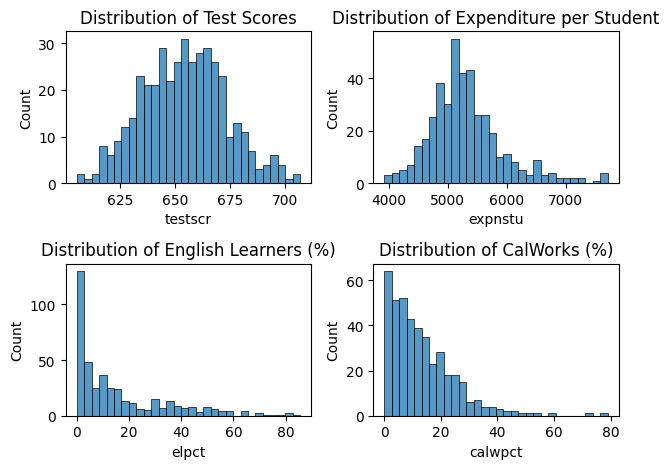

In [ ]:

# Histogram for test scores
plt.subplot(2, 2, 1)
sns.histplot(df["testscr"], bins=30)
plt.title("Distribution of Test Scores")

# Histogram for expenditure per student
plt.subplot(2, 2, 2)
sns.histplot(df["expnstu"], bins=30)
plt.title("Distribution of Expenditure per Student")

# Histogram for percent of English learners
plt.subplot(2, 2, 3)
sns.histplot(df["elpct"], bins=30)
plt.title("Distribution of English Learners (%)")

# Histogram for percent qualifying for CalWorks
plt.subplot(2, 2, 4)
sns.histplot(df["calwpct"], bins=30)
plt.title("Distribution of CalWorks (%)")

plt.tight_layout()
plt.show()

## Conduct simple linear regressions for baseline

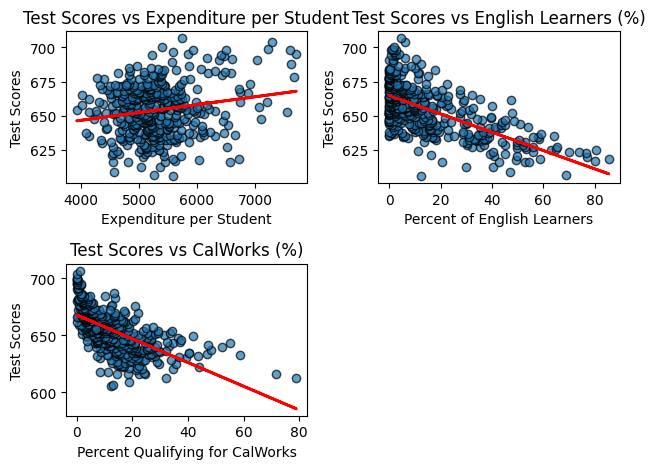

In [ ]:


from sklearn.linear_model import LinearRegression

# Function to compute and return regression line values
def add_regression_line(x, y, df):
    X = df[x].values.reshape(-1, 1)
    Y = df[y].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, Y)
    predicted = model.predict(X)
    return predicted

# Scatter plot for test scores vs expenditure per student
plt.subplot(2, 2, 1)
plt.scatter(df["expnstu"], df["testscr"], alpha=0.7, edgecolor="black")
plt.plot(df["expnstu"], add_regression_line("expnstu", "testscr", df), color=\
         "red", linewidth=2)
plt.title("Test Scores vs Expenditure per Student")
plt.xlabel("Expenditure per Student")
plt.ylabel("Test Scores")

# Scatter plot for test scores vs percent of English learners
plt.subplot(2, 2, 2)
plt.scatter(df["elpct"], df["testscr"], alpha=0.7, edgecolor="black")
plt.plot(df["elpct"], add_regression_line("elpct", "testscr", df), color="red",\
         linewidth=2)
plt.title("Test Scores vs English Learners (%)")
plt.xlabel("Percent of English Learners")
plt.ylabel("Test Scores")

# Scatter plot for test scores vs percent qualifying for CalWorks
plt.subplot(2, 2, 3)
plt.scatter(df["calwpct"], df["testscr"], alpha=0.7, edgecolor="black")
plt.plot(df["calwpct"], add_regression_line("calwpct", "testscr", df), \
         color="red" ,linewidth=2)
plt.title("Test Scores vs CalWorks (%)")
plt.xlabel("Percent Qualifying for CalWorks")
plt.ylabel("Test Scores")

plt.tight_layout()
plt.show()

##Conducting linear regression, KNN, Ridge and Lasso regression on a train/test-split dataset. Calculating and comparing training, test and cross-validation scores

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np


X = df[['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu', \
        'expnstu', 'str', 'avginc', 'elpct']]
y = df['testscr']

# train/test split with seed specified for replicability
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(X_train.columns)  # column names to help identify output
print("\nlr.coef_: "+str(lr.coef_))
print("\nlr.intercept_: {}".format(lr.intercept_))

# Looking at the training set and test set performance using r squared:

print("Linear Regression Training set score: {:.2f}".format(lr.score(X_train,
                                                                     y_train)))
print("Linear Regression Test set score: {:.2f}".format(lr.score(X_test,
                                                                 y_test)))


from sklearn.model_selection import cross_val_score

print('Linear Regression Cross-Validation Score:', np.mean(cross_val_score
 (LinearRegression(), X_train, y_train, cv=10, scoring='r2')))

Index(['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu',
       'expnstu', 'str', 'avginc', 'elpct'],
      dtype='object')

lr.coef_: [ 2.37299343e-04 -9.68465212e-03 -1.05122232e-01 -3.63632211e-01
  2.23981150e-03 -1.50110373e+00  1.87297506e-03 -3.68530746e-01
  5.17180694e-01 -1.97462843e-01]

lr.intercept_: 664.1994881014358
Linear Regression Training set score: 0.81
Linear Regression Test set score: 0.81
Linear Regression Cross-Validation Score: 0.7793254938876506


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN regressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

# Perform cross-validation on the training data
print("KNN Training set score: {:.2f}".format(knn.score(X_train_scaled,
                                                        y_train)))
print("KNN Test set score: {:.2f}".format(knn.score(X_test_scaled, y_test)))

# Ensure a fresh model is used for cross-validation
knn_cv_score = np.mean(cross_val_score(KNeighborsRegressor(), X_train_scaled,
                                       y_train, cv=10, scoring='r2'))
print("KNN Regression Cross-Validation Score: {:.2f}".format(knn_cv_score))

KNN Training set score: 0.81
KNN Test set score: 0.77
KNN Regression Cross-Validation Score: 0.71


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
ridge_cv_score = np.mean(cross_val_score(ridge, X_train, y_train, cv=10,
                                         scoring='r2'))

print("Ridge Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Ridge Cross-Validation Score: {:.2f}".format(ridge_cv_score))

Ridge Training set score: 0.81
Ridge Test set score: 0.81
Ridge Cross-Validation Score: 0.78


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=50)  # alpha set based on feedback in output
lasso.fit(X_train, y_train)

lasso_cv_score = np.mean(cross_val_score(lasso, X_train, y_train, cv=10,
                                         scoring='r2'))
print("Lasso Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Lasso Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Lasso Regression Cross-Validation Score: {:.2f}".format(lasso_cv_score))

Lasso Training set score: 0.77
Lasso Test set score: 0.73
Lasso Regression Cross-Validation Score: 0.75


Linear Regression, KNN (with StandardScalar and k=5), Ridge and Lasso seem to be perform at around the same accuracy, capturing around 79% of the variance with the chosen alphas. Linear Regression and Ridge appear to have somewhat higher Cross-Validation scores than the other models.

## Testing the impact of scaling on each model's scores

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Linear Regression without scaling
lr = LinearRegression()
lr_cv_score_no_scaling = np.mean(cross_val_score(lr, X_train, y_train, cv=kf,
                                                 scoring='r2'))

# Linear Regression with scaling
lr_with_scaling = make_pipeline(StandardScaler(), LinearRegression())
lr_cv_score_with_scaling = np.mean(cross_val_score\
 (lr_with_scaling, X_train, y_train, cv=kf, scoring='r2'))


# Fit models for training & test scores
lr.fit(X_train, y_train)
lr_with_scaling.fit(X_train, y_train)


# Print Linear Regression results
print("Linear Regression Training Scores:")
print(f"Without Scaling: {lr.score(X_train, y_train):.2f}")
print(f"With Scaling: {lr_with_scaling.score(X_train, y_train):.2f}")

print("\nLinear Regression Test Scores:")
print(f"Without Scaling: {lr.score(X_test, y_test):.2f}")
print(f"With Scaling: {lr_with_scaling.score(X_test, y_test):.2f}")

print("\nLinear Regression Cross-Validation Scores:")
print(f"Without Scaling: {lr_cv_score_no_scaling:.2f}")
print(f"With Scaling: {lr_cv_score_with_scaling:.2f}")



Linear Regression Training Scores:
Without Scaling: 0.81
With Scaling: 0.81

Linear Regression Test Scores:
Without Scaling: 0.81
With Scaling: 0.81

Linear Regression Cross-Validation Scores:
Without Scaling: 0.77
With Scaling: 0.77


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# KNN without scaling
knn = KNeighborsRegressor()
knn_cv_score_no_scaling = np.mean(cross_val_score(knn, X_train, y_train,
                                                  cv=kf, scoring='r2'))

# KNN with scaling
knn_with_scaling = make_pipeline(StandardScaler(), KNeighborsRegressor
 (n_neighbors=7))
knn_cv_score_with_scaling = np.mean(cross_val_score
 (knn_with_scaling, X_train, y_train, cv=kf, scoring='r2'))

# Fit models for training & test scores
knn.fit(X_train, y_train)
knn_with_scaling.fit(X_train, y_train)

# Print KNN results
print("KNN Training Scores:")
print(f"Without Scaling: {knn.score(X_train, y_train):.2f}")
print(f"With Scaling: {knn_with_scaling.score(X_train, y_train):.2f}")

print("\nKNN Test Scores:")
print(f"Without Scaling: {knn.score(X_test, y_test):.2f}")
print(f"With Scaling: {knn_with_scaling.score(X_test, y_test):.2f}")

print("\nKNN Regression Cross-Validation Scores:")
print(f"Without Scaling: {knn_cv_score_no_scaling:.2f}")
print(f"With Scaling: {knn_cv_score_with_scaling:.2f}\n")



KNN Training Scores:
Without Scaling: 0.30
With Scaling: 0.80

KNN Test Scores:
Without Scaling: 0.08
With Scaling: 0.78

KNN Regression Cross-Validation Scores:
Without Scaling: -0.13
With Scaling: 0.70



In [ ]:
from sklearn.linear_model import Ridge

# Ridge without scaling
ridge = Ridge(alpha=1.0)
ridge_cv_score_no_scaling = np.mean(cross_val_score
 (ridge, X_train, y_train, cv=kf, scoring='r2'))

# Ridge with scaling
ridge_with_scaling = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_cv_score_with_scaling = np.mean(cross_val_score
 (ridge_with_scaling, X_train, y_train, cv=kf, scoring='r2'))

# Fit models for training & test scores
ridge.fit(X_train, y_train)
ridge_with_scaling.fit(X_train, y_train)

# Print Ridge Regression results
print("Ridge Regression Training Scores:")
print(f"Without Scaling: {ridge.score(X_train, y_train):.2f}")
print(f"With Scaling: {ridge_with_scaling.score(X_train, y_train):.2f}")

print("\nRidge Regression Test Scores:")
print(f"Without Scaling: {ridge.score(X_test, y_test):.2f}")
print(f"With Scaling: {ridge_with_scaling.score(X_test, y_test):.2f}")

print("\nRidge Regression Cross-Validation Scores:")
print(f"Without Scaling: {ridge_cv_score_no_scaling:.2f}")
print(f"With Scaling: {ridge_cv_score_with_scaling:.2f}")


Ridge Regression Training Scores:
Without Scaling: 0.81
With Scaling: 0.81

Ridge Regression Test Scores:
Without Scaling: 0.81
With Scaling: 0.81

Ridge Regression Cross-Validation Scores:
Without Scaling: 0.77
With Scaling: 0.77


In [ ]:
from sklearn.linear_model import Lasso

# Lasso without scaling
lasso = Lasso(alpha=10)
lasso_cv_score_no_scaling = np.mean(cross_val_score
 (lasso, X_train, y_train, cv=kf, scoring='r2'))

# Lasso with scaling
lasso_with_scaling = make_pipeline(StandardScaler(), Lasso(alpha=10))
lasso_cv_score_with_scaling = np.mean(cross_val_score
 (lasso_with_scaling, X_train, y_train, cv=kf, scoring='r2'))

# Fit models for training and test scores
lasso.fit(X_train, y_train)
lasso_with_scaling.fit(X_train, y_train)

# Print results
print("Lasso Regression Training Scores:")
print(f"Without Scaling: {lasso.score(X_train, y_train):.2f}")
print(f"With Scaling: {lasso_with_scaling.score(X_train, y_train):.2f}")

print("\nLasso Regression Test Scores:")
print(f"Without Scaling: {lr.score(X_test, y_test):.2f}")
print(f"With Scaling: {lasso_with_scaling.score(X_test, y_test):.2f}")

print("\nLasso Regression Cross-Validation Scores:")
print(f"Without Scaling: {lasso_cv_score_no_scaling:.2f}")
print(f"With Scaling: {lasso_cv_score_with_scaling:.2f}")


Lasso Regression Training Scores:
Without Scaling: 0.79
With Scaling: 0.45

Lasso Regression Test Scores:
Without Scaling: 0.81
With Scaling: 0.39

Lasso Regression Cross-Validation Scores:
Without Scaling: 0.76
With Scaling: 0.41


In [ ]:
from sklearn.linear_model import Lasso

# Lasso with scaling
lasso_with_scaling = make_pipeline(StandardScaler(), Lasso(alpha=0.1))

#alpha reduced to accomodate scaled data
lasso_cv_score_with_scaling = np.mean\
 (cross_val_score(lasso_with_scaling, X_train, y_train, cv=kf, scoring='r2'))

# Fit models for training and test scores
lasso.fit(X_train, y_train)
lasso_with_scaling.fit(X_train, y_train)

# Print results
print("Lasso Regression Training Scores:")
print(f"Without Scaling: {lasso.score(X_train, y_train):.2f}")
print(f"With Scaling: {lasso_with_scaling.score(X_train, y_train):.2f}")

print("\nLasso Regression Test Scores:")
print(f"Without Scaling: {lr.score(X_test, y_test):.2f}")
print(f"With Scaling: {lasso_with_scaling.score(X_test, y_test):.2f}")

print("\nLasso Regression Cross-Validation Scores:")
print(f"Without Scaling: {lasso_cv_score_no_scaling:.2f}")
print(f"With Scaling: {lasso_cv_score_with_scaling:.2f}")

Lasso Regression Training Scores:
Without Scaling: 0.79
With Scaling: 0.81

Lasso Regression Test Scores:
Without Scaling: 0.81
With Scaling: 0.81

Lasso Regression Cross-Validation Scores:
Without Scaling: 0.76
With Scaling: 0.77


For linear regression and Ridge, StandardScalar there appears to be little difference between applying Standard Scalar and not.
  
However, KNN, being based on calculating Euclidian distance, is completely dependant on feature scaling. Without feature scaling, KNN's R^2 was negative, which means it performed worse than simply predicting the mean score.

For Lasso, the impact of scaling was dependent on the chosen alpha. With an alpha of 10, the model performed worse when using scaled data, however with a lower alpha (less regulariazation) it scored marginally better.

# Finding optimal hyperparameters for each model using GridSearchCV. For KNN the hyperparameter is k (number of neighbours considered for each prediction), while for Ridge and Lasso it's alpha - the degree of regularization.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid (only tuning k-values)
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19 ]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    cv=10,  # 10-fold cross-validation
    scoring='r2',  # R-squared as the evaluation metric
    n_jobs=-1  # Use all CPU cores for efficiency
)

# Perform the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Find the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']
print("Best k-value:", best_k)

# Train the best model using the optimal k
best_knn = grid_search.best_estimator_

# Evaluate the optimized model
print("Optimized KNN Training set score: {:.2f}"
.format(best_knn.score(X_train_scaled, y_train)))
print("Optimized KNN Test set score: {:.2f}"
.format(best_knn.score(X_test_scaled, y_test)))

# Perform cross-validation on the best model
best_knn_cv_score = np.mean(cross_val_score
 (best_knn, X_train_scaled, y_train, cv=10, scoring='r2'))
print("Optimized KNN Regression Cross-Validation Score: \
{:.2f}".format(best_knn_cv_score))


Best k-value: 15
Optimized KNN Training set score: 0.77
Optimized KNN Test set score: 0.76
Optimized KNN Regression Cross-Validation Score: 0.73


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid for alpha tuning
param_grid = {
    'alpha': np.logspace(-3, 3, 10)
    # Test alphas from 0.001 to 1000 on a logarithmic scale
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    Ridge(),
    param_grid,
    cv=10,  # 10-fold cross-validation
    scoring='r2',  # Use R-squared as the evaluation metric
    n_jobs=-1  # Use all available CPU cores
)

# Perform the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameter (alpha)
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Train the best model using the optimal alpha
best_ridge = grid_search.best_estimator_

# Evaluate the optimized model
print("Optimized Ridge Training set score: {:.2f}"
.format(best_ridge.score(X_train_scaled, y_train)))
print("Optimized Ridge Test set score: {:.2f}"
.format(best_ridge.score(X_test_scaled, y_test)))

# Perform cross-validation on the best model
best_ridge_cv_score = np.mean(cross_val_score
 (best_ridge, X_train_scaled, y_train, cv=10, scoring='r2'))
print("Optimized Ridge Regression Cross-Validation Score: {:.2f}"
.format(best_ridge_cv_score))


Best alpha: 10.0
Optimized Ridge Training set score: 0.80
Optimized Ridge Test set score: 0.80
Optimized Ridge Regression Cross-Validation Score: 0.78


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid for alpha tuning
param_grid = {
    'alpha': np.logspace(-3, 3, 10)
    # Test alphas from 0.001 to 1000 on a logarithmic scale
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    Lasso(max_iter=10000),  # Increase max_iter to ensure convergence
    param_grid,
    cv=10,  # 10-fold cross-validation
    scoring='r2',  # Use R-squared as the evaluation metric
    n_jobs=-1  # Use all available CPU cores
)

# Perform the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameter (alpha)
best_alpha = grid_search.best_params_['alpha']
print("Best alpha for Lasso:", best_alpha)

# Train the best model using the optimal alpha
best_lasso = grid_search.best_estimator_

# Evaluate the optimized model
print("Optimized Lasso Training set score: {:.2f}"
.format(best_lasso.score(X_train_scaled, y_train)))
print("Optimized Lasso Test set score: {:.2f}"
.format(best_lasso.score(X_test_scaled, y_test)))

# Perform cross-validation on the best model
best_lasso_cv_score = np.mean(cross_val_score
 (best_lasso, X_train_scaled, y_train, cv=10, scoring='r2'))
print("Optimized Lasso Regression Cross-Validation Score: {:.2f}"
.format(best_lasso_cv_score))


Best alpha for Lasso: 0.1
Optimized Lasso Training set score: 0.81
Optimized Lasso Test set score: 0.81
Optimized Lasso Regression Cross-Validation Score: 0.78


For KNN, results improved marginally with k = 15 instead of k = 5.

For Ridge, results were essentially the same with an optimized alpha = 10

For Lasso, the optimized alpha = 0.1 had already been found.

#Displaying coefficients in the two best-performing models to determine the most predictive variables in each model

In [ ]:
import pandas as pd

varable_names = ['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer',
                 'compstu', 'expnstu', 'str', 'avginc', 'elpct']


df_coef = pd.DataFrame({
    "Variable": X.columns,
    "Linear Regression Coef": lr.coef_,
    "Lasso Regression Coef": best_lasso.coef_
})



print(df_coef)





   Variable  Linear Regression Coef  Lasso Regression Coef
0   enrltot                0.000237              -0.000000
1  teachers               -0.009685              -0.000000
2   calwpct               -0.105122              -1.015310
3   mealpct               -0.363632              -9.931920
4  computer                0.002240               0.000000
5   compstu               -1.501104               0.019521
6   expnstu                0.001873               1.074776
7       str               -0.368531              -0.580477
8    avginc                0.517181               3.697999
9     elpct               -0.197463              -3.349810


The two models do not seem to agree on which factors are the most important. The linear regression assigns the highest weight to computer per student, wheras Lasso emphasizes percent qualifying for reduced-price lunch (proxy for socioeconomically disadvantaged), district average income and percent of English learners to be the most important.

However, the models mostly agree on which variables are *not* important as Lasso has completly removed three variables which linear regression agrees are not important.


#Conclusion

Based on the results, I would probably use Lasso for predicting unseen data.

This is because Lasso seems to generalize better by assigning more weight to the most important variables and removing redundant variables.

Furthermore, while they have comparable predictive accuracy, Lasso has a slightly higher Cross-Validation score (0.78 vs 0.77), which should make it more robust.